Olympic Dataset day 

Un ensemble de données sur les biographies des athlètes olympiques au cours des 100 dernières années.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

xl = pd.ExcelFile('./data/olympics-data.xlsx')
bios_df = pd.read_excel(xl, sheet_name='bios')
bios_df

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25
...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18


Chaque fois que nous travaillons avec un nouvel ensemble de données, nous devons en avoir une première idée en utilisant head(), info() et describe().

In [2]:
bios_df.head(10)

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25
5,6,Nicolas Chatelain,1970-01-13,Amiens,Somme,FRA,France,181.0,70.0,NaN
6,7,Patrick Chila,1969-11-27,Ris-Orangis,Essonne,FRA,France,180.0,73.0,NaN
7,8,Henri Cochet,1901-12-14,Villeurbanne,Rhône,FRA,France,NaN,NaN,1987-04-02
8,9,Marcel Cousin,1896-08-04,Nîmes,Gard,FRA,France,NaN,NaN,1986-08-01
9,10,Guy de la Chapelle,1868-07-16,Farges-Allichamps,Cher,FRA,France,NaN,NaN,1923-08-27


In [3]:
bios_df.describe()

,athlete_id,height_cm,weight_kg
count,145500.000000,106651.000000,102070.000000
mean,73686.188955,176.333724,71.890996
std,42868.960158,10.380282,14.465540
min,1.000000,127.000000,25.000000
25%,36663.750000,170.000000,62.000000
50%,73302.500000,176.000000,70.000000
75%,110306.250000,183.000000,80.000000
max,149814.000000,226.000000,198.000000


In [4]:
bios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


##### Traitement de données manquantes

Les données manquantes (numpy.nan) sont un problème récurrent dans l'analyse des données. Elles peuvent provenir de diverses raisons telles que des erreurs de saisie, des mesures non enregistrées ou des informations non fournies. 

1) Detection

Avant de commencer l'analyse d'un ensemble de données, il convient de s'occuper en priorité des valeurs manquantes.

In [5]:
bios_df.isnull().sum()

athlete_id           0
name                 0
born_date         1807
born_city        34592
born_region      34592
born_country     34592
NOC                  1
height_cm        38849
weight_kg        43430
died_date       111560
dtype: int64

Suppression des valeurs manquantes

In [6]:
df = pd.DataFrame([[np.nan, 1, 2], [1, 2, np.nan], [1, 2, 3]], columns=['A', 'B', 'C'])
df

,A,B,C
0,NaN,1,2.0
1,1.0,2,NaN
2,1.0,2,3.0


In [7]:
#### en utilisant de supression et des axes differentes
df.dropna()

,A,B,C
2,1.0,2,3.0


Imputation des valeurs manquantes avec **fillna()**

In [8]:
df['A'].fillna(3)

0    3.0
1    1.0
2    1.0
Name: A, dtype: float64

La méthode **interpolate()** de pandas est utilisée pour combler les valeurs manquantes dans une série ou un DataFrame en effectuant une interpolation. Elle permet d'estimer les valeurs intermédiaires en fonction des données existantes

In [9]:
df.interpolate(method = 'linear')

,A,B,C
0,NaN,1,2.0
1,1.0,2,2.5
2,1.0,2,3.0


In [10]:
bios_df.head(5)

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [11]:
#### Traitement des valeurs manquantes dans notre ensemble de données
bios_df['died_date'].fillna('Still Alive', inplace = True)

C:\Users\genis\AppData\Local\Temp\ipykernel_25632\2694711392.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bios_df['died_date'].fillna('Still Alive', inplace = True)


Exercise

En utilisant les méthodes apprises ci-dessus, complétez les valeurs manquantes pour les colonnes poids et taille. 

##### Les valeurs textuelles dans Pandas :
Pandas permet plusieurs opérations pour rechercher, filtrer et manipuler des colonnes contenant des chaînes de caractères (str).

**contains()** : Filtrer les valeurs contenant un texte spécifique
Permet de rechercher partout dans la chaîne.

In [ ]:
#### filtrer toutes les valeurs de la colonne « born_city » si elles contiennent l'expression « Gen ».
bios_df.loc[bios_df['born_city'].str.contains('Gen', na=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
506,508,Doris Haas,1964-12-27,Gengenbach,Baden-Württemberg,GER,West Germany,165.0,59.0,NaT
743,747,Jaimie Dawson,1969-07-28,Genève (Geneva),Genève,SUI,Canada,181.0,79.0,NaT
2350,2360,Pernille Dupont Jensen,1967-10-06,Gentofte,Hovedstaden,DEN,Denmark,NaN,NaN,NaT
2384,2394,Michael Tauson,1966-06-25,Gentofte,Hovedstaden,DEN,Denmark,193.0,83.0,NaT
2561,2573,Maurice Ferrier,1901-11-08,Genève (Geneva),Genève,SUI,Switzerland,NaN,NaN,1973-09-09
...,...,...,...,...,...,...,...,...,...,...
144558,148250,Oliver Lauridsen,1989-03-24,Gentofte,Hovedstaden,DEN,Denmark,198.0,108.0,NaT
144565,148257,Patrick Russell,1993-01-04,Gentofte,Hovedstaden,DEN,Denmark,186.0,93.0,NaT
144566,148258,Frederik Storm,1989-02-20,Gentofte,Hovedstaden,DEN,Denmark,180.0,NaN,NaT
144598,148290,Matthias Versluis,1994-07-18,Genolier,Vaud,SUI,Finland,NaN,NaN,NaT


**endswith()** : Filtrer les valeurs qui se terminent par un certain texte

In [106]:
bios_df.loc[bios_df['name'].str.endswith('ov', na=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
358,359,Ivan Ivanov,1956-06-10,NaN,NaN,NaN,Bulgaria,NaN,NaN,NaT
360,361,Stefan Mlyakov,1971-09-22,Gabrovo,Gabrovo,BUL,Bulgaria,183.0,80.0,NaT
379,380,Rob Rusnov,1973-12-09,Toronto,Ontario,CAN,Canada,180.0,89.0,NaT
722,726,Yasen Borisov,1962-06-02,NaN,NaN,NaN,Bulgaria,179.0,68.0,NaT
724,728,Ivan Ivanov,1966-02-19,NaN,NaN,NaN,Bulgaria,179.0,71.0,NaT
...,...,...,...,...,...,...,...,...,...,...
145147,148864,Pavel Kulizhnikov,1994-04-20,Vorkuta,Respublika Komi,RUS,ROC,NaN,NaN,NaT
145148,148865,Ruslan Murashov,1992-12-29,Voskresensk,Moskva Oblast,RUS,ROC,NaN,NaN,NaT
145149,148866,Viktor Mushtakov,1996-12-19,Barnaul,Altay Kray,RUS,ROC,NaN,NaN,NaT
145285,149006,Nikolaj Majorov,2000-08-18,Luleå,Norrbotten,SWE,Sweden,NaN,NaN,NaT


**startswith()** : Filtrer les valeurs qui commencent par un certain texte
Permet de sélectionner uniquement les valeurs d’une colonne qui commencent par un préfixe spécifique.

In [125]:
#### tribute to Shaquille O'Neal
bios_df.loc[bios_df['name'].str.startswith('Shaq', na=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
6722,6755,Shaquille O'Neal,1972-03-06,Newark,New Jersey,USA,United States,216.0,137.0,NaT
143978,147636,Shaquille Moosa,2002-04-10,NaN,NaN,NaN,Zambia,NaN,NaN,NaT


Exercise: 

Trouver les athlètes ayant le même prénom que vous

Ensuite, créez un histogramme qui affiche la répartition des pays (NOC) des athlètes trouvés.


##### Séries Chronologiques
En utilisant le NumPy **datetime64**, pandas contient des capacités et des fonctionnalités étendues pour travailler avec des données de séries temporelles dans tous les domaines. 
Les séries chronologiques sont des ensembles de données indexées par le temps. Elles sont essentielles pour l'analyse des tendances, des prédictions et des modèles temporels.

In [12]:
type(bios_df['born_date'][0])

str

In [13]:
#### la conversion entre str et datetime
new_datetime = pd.to_datetime(bios_df['born_date'][0]).date
new_datetime

<bound method Timestamp.date of Timestamp('1886-12-12 00:00:00')>

Dans notre dataset, nous avons deux colonnes contenant des dates sous forme de chaînes de caractères (born_date, died_date). Nous devons les convertir en datetime pour une meilleure manipulation :

In [14]:
bios_df["born_date"] = pd.to_datetime(bios_df["born_date"], errors='coerce', exact = False)
bios_df["died_date"] = pd.to_datetime(bios_df["died_date"], errors='coerce', exact = False)

In [15]:
bios_df['born_date']

0        1886-12-12
1        1969-04-01
2        1898-08-13
3        1895-05-11
4        1878-04-17
            ...    
145495   2002-01-30
145496   1999-09-20
145497   1998-05-08
145498   1899-05-19
145499   1913-07-15
Name: born_date, Length: 145500, dtype: datetime64[ns]

In [16]:
bios_df['born_date'].dt.year.dropna()

0         1886.0
1         1969.0
2         1898.0
3         1895.0
4         1878.0
           ...  
145495    2002.0
145496    1999.0
145497    1998.0
145498    1899.0
145499    1913.0
Name: born_date, Length: 143693, dtype: float64

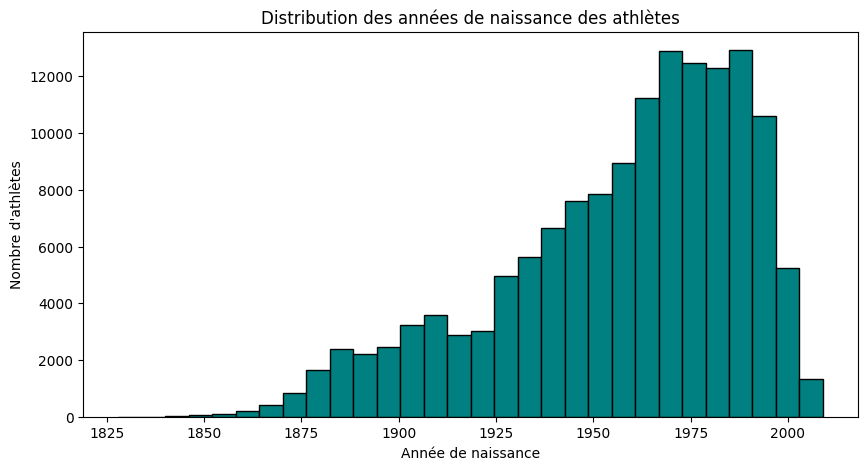

In [135]:
#### Histogramme des Années de Naissance
all_years = bios_df["born_date"].dt.year.dropna().astype(int)

plt.figure(figsize = (10,5))
plt.hist(all_years, bins = 30, color = 'teal', edgecolor = 'black')
plt.xlabel("Année de naissance")
plt.ylabel("Nombre d'athlètes")
plt.title("Distribution des années de naissance des athlètes")
plt.show()

In [18]:
bios_df['born_date']

0        1886-12-12
1        1969-04-01
2        1898-08-13
3        1895-05-11
4        1878-04-17
            ...    
145495   2002-01-30
145496   1999-09-20
145497   1998-05-08
145498   1899-05-19
145499   1913-07-15
Name: born_date, Length: 145500, dtype: datetime64[ns]

In [21]:
bios_df.dropna(subset = ['born_date'], inplace = True) ##### supprime uniquement les lignes où la colonne born_date contient une valeur manquante (NaN).
bios_df.sort_values(by = ['born_date']) ### Note: Le tri n'est pas appliqué directement au DataFrame, car inplace=True n’a pas été précisé.

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
62451,62914,William Martin,1828-10-25,Rouen,Seine-Maritime,FRA,France,NaN,NaN,1905-02-25
63109,63579,Ferdinand de Schlatter,1831-02-14,Paris IVe,Paris,FRA,France,NaN,NaN,1907-07-04
11836,11898,"Louis, Comte du Douet de Graville",1831-02-27,Bernières,Seine-Maritime,FRA,France,NaN,NaN,1912-10-12
2235,2245,Thomas Scott,1833-01-03,Warren,Ohio,USA,United States,NaN,NaN,1911-06-23
2220,2230,Samuel Duvall,1836-03-11,Liberty,Indiana,USA,United States,NaN,NaN,1908-09-26
...,...,...,...,...,...,...,...,...,...,...
140904,144433,Momiji Nishiya,2007-08-30,NaN,NaN,NaN,Japan,NaN,NaN,NaT
137792,141168,Rayssa Leal,2008-01-04,Imperatriz,Maranhão,BRA,Brazil,147.0,35.0,NaT
139592,143068,Sky Brown,2008-07-07,Miyazaki,Miyazaki,JPN,Great Britain,NaN,NaN,NaT
140902,144431,Kokona Hiraki,2008-08-26,NaN,NaN,NaN,Japan,NaN,NaN,NaT


Visualisation des principales nationalités de tous les athlètes sur notre ligne temporelle

Exercise

1) Ajoutez une nouvelle colonne booléenne nommée **'born_after_2000'**, qui indique **True** si un athlète est né après l'année 2000 et **False** dans le cas contraire. 
2) Affichez un PieChart de la répartition des pays entre 2000 et l'année la plus récente de l'ensemble de données.

In [32]:
# countries = ['Albania', 'France', 'Switzerland', 'United States']
new_df = df['NOC'].loc[(df['height_cm'] > 200.0)]
new_df

1080            Bulgaria
1673                Cuba
2647      Czechoslovakia
2827        Soviet Union
2832        Unified Team
               ...      
143784     United States
143833     United States
143834     United States
143835     United States
143919         Venezuela
Name: NOC, Length: 1219, dtype: object

In [ ]:
bios_df[['name', 'NOC']].loc[bios_df['name'].values.startswith('Nikita')]

In [43]:
new_df.value_counts()

NOC
United States                              141
Germany                                     67
Australia                                   57
Russian Federation                          53
Italy                                       48
                                          ... 
Serbia Serbia and Montenegro Yugoslavia      1
Finland South Africa                         1
France United States                         1
Australia Russian Federation                 1
Republic of Moldova                          1
Name: count, Length: 92, dtype: int64

##### Manipulation Avancée des Données avec Pandas : Group By, Merge, Join et Concat

Lors du traitement des données tabulaires, il est souvent nécessaire d’agréger, fusionner ou concaténer des DataFrames.

**groupby()** : Regrouper et Aggréger les Données

Le groupby permet de regrouper les données en fonction d'une ou plusieurs colonnes et d'appliquer des opérations d'agrégation (somme, moyenne, comptage, etc.).

In [30]:
data = {"Athlete": ["A", "B", "A", "C", "B"],
        "Discipline": ["Natation", "Athlétisme", "Natation", "Cyclisme", "Athlétisme"],
        "Medals": [1, 2, 3, 1, 4],
        'Max Speed': [380., 370., 240., 260., 180.]}
df = pd.DataFrame(data)
print(df)
# Regrouper par athlète et calculer le total des médailles
medals_per_athlete = df.groupby("Athlete")["Medals"].sum()
print(medals_per_athlete)

  Athlete  Discipline  Medals  Max Speed
0       A    Natation       1      380.0
1       B  Athlétisme       2      370.0
2       A    Natation       3      240.0
3       C    Cyclisme       1      260.0
4       B  Athlétisme       4      180.0
Athlete
A    4
B    6
C    1
Name: Medals, dtype: int64


In [29]:
df.groupby('Discipline')['Max Speed'].mean()

Discipline
Athlétisme    275.0
Cyclisme      260.0
Natation      310.0
Name: Max Speed, dtype: float64

In [31]:
#### Exemple dans notre dataset
athletes_per_country = bios_df.groupby("NOC")["athlete_id"].count()
print(athletes_per_country)

NOC
Afghanistan                 95
Albania                     46
Albania Australia            1
Albania Bulgaria             1
Albania Greece               1
                          ... 
West Indies Federation       6
Yemen                       32
Yugoslavia                1155
Zambia                     151
Zimbabwe                   197
Name: athlete_id, Length: 694, dtype: int64


**merge()** : Fusionner des DataFrames

La méthode merge() permet de combiner deux DataFrames en fonction d'une clé commune, similaire à une jointure SQL.

In [55]:
athletes = pd.DataFrame({"athlete_id": ['A1', 'A2', 'A3'], "name": ["Alice", "Bob", "Charlie"]})
medals = pd.DataFrame({"athlete_id": ['A1', 'A2', 'A3'], "gold_medals": [2, 0, 1]})
athletes

,athlete_id,name
0,A1,Alice
1,A2,Bob
2,A3,Charlie


In [56]:
medals

,athlete_id,gold_medals
0,A1,2
1,A2,0
2,A3,1


In [57]:
#### Fusion sur la colonne 'athlete_id'
merged_df = pd.merge(athletes, medals, on="athlete_id")
merged_df

,athlete_id,name,gold_medals
0,A1,Alice,2
1,A2,Bob,0
2,A3,Charlie,1


**join()** : Fusionner sur l’Index

Contrairement à merge(), la méthode join() fonctionne sur les index des DataFrames.

In [65]:
first_df = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
print('First DF: {}\n'.format(first_df))
other = pd.DataFrame({'key2': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})
print('Second DF: {}\n'.format(other))

joined_df = first_df.join(other)
joined_df

First DF:   key1   A
0   K0  A0
1   K1  A1
2   K2  A2
3   K3  A3
4   K4  A4
5   K5  A5

Second DF:   key2   B
0   K0  B0
1   K1  B1
2   K2  B2



,key1,A,key2,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,NaN,NaN
4,K4,A4,NaN,NaN
5,K5,A5,NaN,NaN


**concat()** : Concaténation de DataFrames

La fonction concat() permet d'assembler plusieurs DataFrames soit en ligne (axis=0), soit en colonne (axis=1).

In [72]:
part1 = pd.DataFrame({"athlete_id": [1, 2], "name": ["Alice", "Bob"]})
part2 = pd.DataFrame({"athlete_id": [3, 4], "name": ["Charlie", "David"]})

print('First DF: {}\n'.format(part1))
print('Second DF: {}\n'.format(part2))

#### Concaténation verticale
concatenated_df = pd.concat([part1, part2], axis=0)
concatenated_df

First DF:    athlete_id   name
0           1  Alice
1           2    Bob

Second DF:    athlete_id     name
0           3  Charlie
1           4    David



,athlete_id,name
0,1,Alice
1,2,Bob
0,3,Charlie
1,4,David


Exercise

Revenons à notre ensemble de données :

1) Imprimez une concaténation de tous les athlètes jouant pour la France ou la Suisse.
2) Regroupez chaque athlète par ville de naissance et calculez la moyenne taille/ville.